<a href="https://colab.research.google.com/github/smwalter96/map_tweets/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install geopy
!pip install folium
!pip install geopandas
!pip install bokeh

     |████████████████████████████████| 8.9MB 3.7MB/s 
     |████████████████████████████████| 2.2MB 45.0MB/s 
  Created wheel for bokeh: filename=bokeh-2.2.3-cp36-none-any.whl size=9296311 sha256=1d3cf198244ebe0fd71fea35380e8e787855eab2a4d493a2e1791ff978fa6987
  Stored in directory: /root/.cache/pip/wheels/dc/96/7b/9c9d48ed392511bc708e39580e18dc7a92f475795cd26b51bf
Successfully built bokeh
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [3]:
import tweepy
from tweepy import Stream
from tweepy.streaming import StreamListener 
from tweepy import OAuthHandler
import csv
import pandas as pd
from geopy.geocoders import Nominatim
import folium
from geopy.extra.rate_limiter import RateLimiter
from random import sample
import numpy as np

In [4]:
# Set tweepy keys and email
consumer_key = "WMDI8EOswG75f2IWE15Aljgfm"
consumer_secret = "7cEiFClzxYNAIgM80crNfkK9VIHyr3IBHErbhJJtx3bnDxr3A8"
access_token = "1161795414267502592-7oAwS0IoQC1Us2HSWDoIG0f5lvDcDW"
access_token_secret = "DcB0iCUqWmOIzS3kH5iQnU2M1XmIDN9MX8r1Q9M7Nntjw"
email = "smwalter96@gmail.com"

In [5]:
# Authorize tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [6]:
# Set hashtags to search
tag = "#cruz"

In [7]:
# Search tweets with a given hashtag
# Return user location
df = pd.DataFrame()
for tweet in tweepy.Cursor(api.search,q=tag,count=100,
                           lang="en",
                           since="2021-01-12").items():    
    #print (tweet.user.location)
    df = df.append({'user_location': tweet.user.location, 'tweet_location': tweet.place,'text': tweet.text},ignore_index=True)
    

In [10]:
df

,text,tweet_location,user_location
0,@TimothyDSnyder Thanks for the thread. Critica...,None,Miami
1,"#Trump, #Cruz, #Hawley incited the crowd to at...",None,India
2,RT @vankapro: 6000 #lawstudents with #lawyers\...,None,United States
3,RT @VadaVotes: THE GOP 🚨IS FAILING TO PROTECT ...,None,"OC, California, USA"
4,RT @trumplimericks2: @Judson4Congress It’s tim...,None,
...,...,...,...
118,@TheRickWilson @JulieAnderson01 #Walmart’s PAC...,None,"Accountability, City USA"
119,Why hasn't #Cruz #Giuliani #brooks or #DonaldT...,None,Ireland
120,RT @thockman64: @senrobportman @CapitolPolice ...,None,"Chagrin Falls, OH"
121,RT @thockman64: @senrobportman @CapitolPolice ...,None,


In [16]:
df1 = df

# Set columns to map
df1 = df[['text', 'user_location']]

# Drop rows with no user location
df1['user_location'].replace('', np.nan, inplace=True)
df1.dropna(inplace=True)
df1

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,user_location
0,@TimothyDSnyder Thanks for the thread. Critica...,Miami
1,"#Trump, #Cruz, #Hawley incited the crowd to at...",India
2,RT @vankapro: 6000 #lawstudents with #lawyers\...,United States
3,RT @VadaVotes: THE GOP 🚨IS FAILING TO PROTECT ...,"OC, California, USA"
5,RT @vankapro: 6000 #lawstudents with #lawyers\...,"in your heart, on your mind"
...,...,...
116,Sheldon #Whitehouse: The Democratic senator ca...,USA
118,@TheRickWilson @JulieAnderson01 #Walmart’s PAC...,"Accountability, City USA"
119,Why hasn't #Cruz #Giuliani #brooks or #DonaldT...,Ireland
120,RT @thockman64: @senrobportman @CapitolPolice ...,"Chagrin Falls, OH"


In [17]:
df1 = df1.loc[np.random.choice(df1.index, size=10)]
df1

,text,user_location
59,RT @trumplimericks2: @ThePubliusUSA @SpeakerPe...,Wisconsin
3,RT @VadaVotes: THE GOP 🚨IS FAILING TO PROTECT ...,"OC, California, USA"
84,RT @vankapro: 6000 #lawstudents with #lawyers\...,"Denver, CO"
18,@Hannahbananahs1 @BGrueskin ...Until they’re A...,CA-3
95,RT @GLBLCIT1: #TheView - The #GOP has yet to c...,"CA, USA"
74,"Expelling #Cruz, #Hawley, and #Jordan would be...",S.F.-East Bay
15,"I’m a DC resident, registered voter, &amp; wil...",Washington DC
103,"📣 New Podcast! ""☎️Gary Russell Jr🔥On Gervonta ...",1-425-569-5241
44,RT @vankapro: 6000 #lawstudents with #lawyers\...,"'burbs near Vancouver, BC"
39,@PhilipRucker I can't believe that people don'...,Miami


In [18]:
# Set geolocator fro geopy
geolocator = Nominatim(timeout=10, user_agent = email)

In [19]:
# Apply geocoder with ratelimit
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
 
# Run geocoder on dataframe and return latitude and longitude
df1['location'] = df1['user_location'].apply(geocode)
df1['Lat'] = df1['location'].apply(lambda x: x.latitude if x else None)
df1['Lon'] = df1['location'].apply(lambda x: x.longitude if x else None)

df1.dropna(inplace=True)
df1.head()

,text,user_location,location,Lat,Lon
59,RT @trumplimericks2: @ThePubliusUSA @SpeakerPe...,Wisconsin,"(Wisconsin, United States, (44.4308975, -89.68...",44.430898,-89.688464
3,RT @VadaVotes: THE GOP 🚨IS FAILING TO PROTECT ...,"OC, California, USA","(OC Streetcar Mainenance and Storage Facility,...",33.748237,-117.893993
84,RT @vankapro: 6000 #lawstudents with #lawyers\...,"Denver, CO","(Denver, Calle 16, Yopal, Casanare, Orinoquia,...",5.342848,-72.395985
18,@Hannahbananahs1 @BGrueskin ...Until they’re A...,CA-3,"(Main Street, Fort Jones, Siskiyou County, Cal...",41.604624,-122.843495
95,RT @GLBLCIT1: #TheView - The #GOP has yet to c...,"CA, USA","(California, United States, (36.7014631, -118....",36.701463,-118.755997


User Locations using Hashtag #cruz


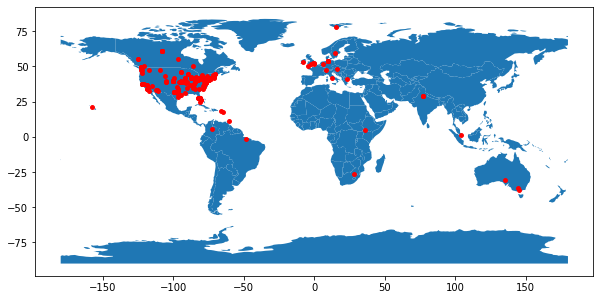

In [ ]:
# Map user location
geometry = [Point(xy) for xy in zip(df1['Lon'], df1['Lat'])]
gdf = GeoDataFrame(df1, geometry=geometry)   

title_text = ('User Locations using Hashtag ' + tag)

print(title_text)
plt.show()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);


In [ ]:
# Plot interactive user locations with tweet text in popups
map1 = folium.Map()
for index,row in df1.iterrows(): 
  popup = folium.Popup(row['text'],
                     max_width=500)
  folium.Marker(location=(row['Lat'],row['Lon']), popup=popup).add_to(map1)

display(map1)

In [26]:
p = figure(title="My first interactive plot!")

p.circle(x=df1['Lat'], y=df1['Lon'], size=10, color="red")
show(p)

In [22]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()

In [24]:
N = 4000
x = df1['Lon']
y = df1['Lat']
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x).astype(int), np.floor(30+2*y).astype(int))]

p = figure()
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
show(p)